In [ ]:
import pandas as pd
import numpy as np
import pyspark.pandas 
import constants

In [ ]:
parquet_file = pq.ParquetFile('data/Aize-studet-project-time-series-v2.parquet')

df = pd.DataFrame(columns=['data', 'timestamp', 'label', 'category', 'unit'])
for i in parquet_file.iter_batches():
    df = pd.concat([df,i.to_pandas()])
    
df.head()

In [ ]:
#df = pd.read_parquet('data/Aize-studet-project-time-series-v2.parquet')

In [ ]:
df = df.set_index('timestamp')

In [ ]:
df.head()

In [ ]:
dataframes = {}

for cat in df['category'].unique():
    df[df['category'] == cat].to_parquet(f'data/{cat}.parquet')
    #dataframes[cat] = df[df['category'] == cat]

motor = dataframes['Motor']
pump_process = dataframes['Pump Process']
pump_monitoring = dataframes['Pump Monitoring (BN)']

In [ ]:
motor = pd.read_parquet('data/motor.parquet')
motor = motor.reset_index()

In [ ]:
motor.head()

In [ ]:
sensor_list = pd.read_csv('data/sensor_list_v2.txt', sep=':', header=None, names=['label', 'sampling time'])
sensor_units = pd.read_csv('data/sensor_units.txt', sep='delimiter', header=None, names=['unit'])
sensor_list['unit'] = sensor_units['unit'].str.split().str[-1]

sensor_list['label'] = sensor_list['label'].str[:-22] # remove the " average sampling time"
sensor_list['sampling time'] = sensor_list['sampling time'].str[:-8].astype('float64')

def category(row):
    for cat in constants.CATEGORIES: 
        if cat in row['label']:
            return cat

def re_label(row):
    for category in constants.CATEGORIES:
        if category in row['label']:
            return row['label'].replace(category+' ','')

sensor_list['category'] = sensor_list.apply(lambda row : category(row), axis=1)
sensor_list['label'] = sensor_list.apply(lambda row : re_label(row), axis=1)
sensor_list.loc[sensor_list['label'] == "RPM", "label"] = 'Motor RPM'
#sensor_list = sensor_list.drop(['category'],axis=1)
display(sensor_list)
#display(motor['label'].unique())
#motor = pd.merge(motor, sensor_list, on='label')

In [ ]:
motor = motor.set_index('timestamp')

In [ ]:
motor = motor.loc[(motor.index >= pd.Timestamp('2023-01-01'))]
motor

In [ ]:
'''for key in dataframes.keys():
    print(f'The value counts of {key}:')
    display(dataframes[key]['label'].value_counts())'''

In [ ]:
import plotly.express as px

fig = px.line(motor, x=motor.index, y='data', color='label')
fig.show()

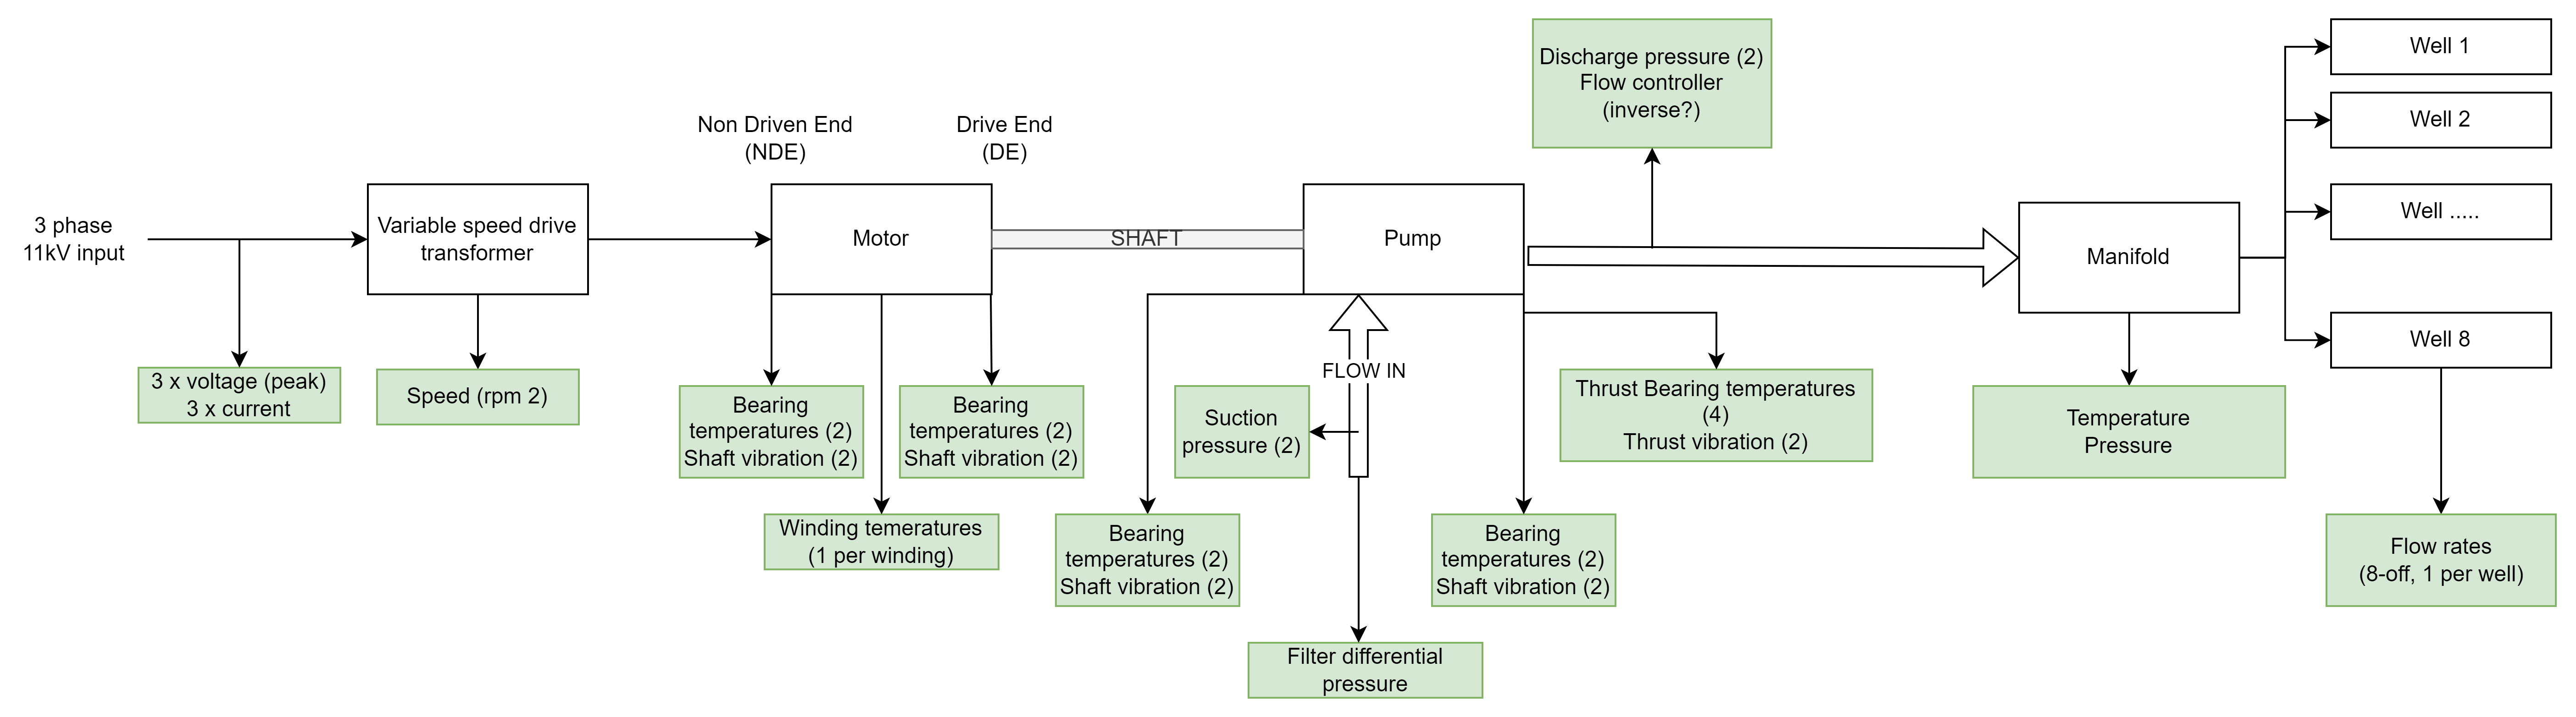